#Machine learning (Metodosupervisado)






# ¿Podemos detectar patrones entre pascientes especificos para identificar posibles reingresos?

##Metas
Al final de este caso, se obtendra el desarrollo de un modelo de clasificación utilizando el algoritmo **Random Forest de clasificacion** para predecir si un paciente será readmitido en un hospital, basándose en sus características y el historial médico.


##Introduccion


**Contexto comercial.** Trabaja para el equipo de Departamento de Calidad y Gestión de Riesgos en un hospital general el cual atiende casos clinicos de un sector de la region.Todos los casos de reingresos son evaludos con la finalidad de dar prioridad dependiendo de urgencia de estos. Algunos pacientes con un historial clinico y padecimientos especificos son mas propensos a reingresar a cuidado hospitalario . Es funcion del Departamento de Calidad y Gestión de Riesgos  supervisar las tasas de readmisión para asegurarse de que los pacientes reciban un tratamiento adecuado y prevenir readmisiones innecesarias.

**Problema comercial.** Su tarea es responder la siguiente pregunta: **¿Existen patrones particulares en los grupos de pacientes que sean indicativos para una proxima readmicion hospitalaria?**

**Contexto analítico.** El equipo de Sistemas de Información de Salud le ha proporcionado datos sobre expendientes de 25000 pacientes. Dichos datos nos muestran el historial clinico de los pacientes .Se debe utilizar un modelo de clasificacion con el cual abordaremos este problema de aprendizaje supervisado  para predicir proximos reingresos.

El caso se estructura de la siguiente manera, vamos a:

1. realizar análisis de datos exploratorios para investigar visualmente la estructura de los datos
2. Utilice estas observaciones para guiar nuestra metodología de agrupamiento y ajustar los modelos adecuados.
3. discutir las ventajas y limitaciones de los métodos de agrupamiento típicos; y finalmente
4. segmentar y generar conclusiones sobre grupos específicos

## Exploracion de Datos


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn # Paquete base de ML

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline


In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/ Data Science I: Fundamentos para la Ciencia de Datos/datasets/train.csv.zip')

In [ ]:
print(df_data.shape)
df_data.head()

(25000, 65)


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,...,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,...,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,...,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,...,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,...,True,True,True,True,True,True,True,True,False,0


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   time_in_hospital                          25000 non-null  int64
 1   num_lab_procedures                        25000 non-null  int64
 2   num_procedures                            25000 non-null  int64
 3   num_medications                           25000 non-null  int64
 4   number_outpatient                         25000 non-null  int64
 5   number_emergency                          25000 non-null  int64
 6   number_inpatient                          25000 non-null  int64
 7   number_diagnoses                          25000 non-null  int64
 8   race_Caucasian                            25000 non-null  bool 
 9   race_AfricanAmerican                      25000 non-null  bool 
 10  gender_Female                             25000 non-null  

El conjunto de datos contiene un total de 65 columnas (variables) y n filas(registros).
Se observa que varias columnas tienen valores faltantes (non-null count menor que el número total de filas). Estos valores faltantes pueden requerir un manejo especial durante el preprocesamiento de datos.

---
Se valida que la presencia de datos nulos en el data



In [ ]:
nulos_por_columna = df_data.isnull().sum()
print(nulos_por_columna)

time_in_hospital              0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
                             ..
metformin-rosiglitazone_No    0
metformin-pioglitazone_No     0
change_No                     0
diabetesMed_Yes               0
readmitted                    0
Length: 65, dtype: int64



**Variables Relevantes**

Las variables que podrian ser relevantes para predecir la suspencion del seguimiento medico incluyen "time_in_hospital","race_Caucasian","race_AfricanAmerican","gender_Female","age_[70-80)","age_[60-70)",
"age_[50-60)","age_[80-90)","age_[40-50)","diag_1_428","diag_1_414",
"diag_1_786","diag_2_276","diag_2_428","diag_2_250","diag_2_427","diag_3_250",
"diag_3_401","diag_3_276","diag_3_428","number_outpatient","number_emergency","number_inpatient","A1Cresult"


In [ ]:
df_data.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000
mean,4.395640,42.96012,1.341080,15.988440,0.365920,0.203280,0.64300,7.420160,0.456400
std,2.991165,19.76881,1.705398,8.107743,1.224419,0.982973,1.26286,1.940932,0.498105
min,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,2.000000,31.00000,0.000000,10.000000,0.000000,0.000000,0.00000,6.000000,0.000000
50%,4.000000,44.00000,1.000000,15.000000,0.000000,0.000000,0.00000,8.000000,0.000000
75%,6.000000,57.00000,2.000000,20.000000,0.000000,0.000000,1.00000,9.000000,1.000000
max,14.000000,126.00000,6.000000,81.000000,36.000000,64.000000,21.00000,16.000000,1.000000


**time_in_hospital:**

*  Representa la cantidad exacta de días que un paciente estuvo hospitalizado en un episodio particular.

*   El rango menor es 1 dia y el rango maximo es de 14 dias (se excluyen estancias menores y mayores a estas).

**race_Caucasian:**

* Indica si el paciente es de **raza caucasica**.

*   Los valores posibles a utilizar son **false** o **true**.

**race_AfricanAmerican:**

* Indica si el paciente es de **raza Africana Americana**.

*   Los valores posibles a utilizar son **false** o **true**.

**gender_Female:**

* Indica el generero del paciente, en este caso si es masculino o femenino.

*   Los valores posibles a utilizar son **false** o **true**.

**age_[80-90):**

*  Indica si la edad del paciente se encuentra dentro de los 80 a 90 años.

*   Los valores posibles a utilizar son **false** o **true**.


**age_[70-80):**

* Indica si la edad del paciente se encuentra dentro de los 70 a 80 años.

*   Los valores posibles a utilizar son **false** o **true**.

**age_[60-70):**

* Indica si la edad del paciente se encuentra dentro de los 60 a 70 años.

*   Los valores posibles a utilizar son **false** o **true**.

**age_[50-60):**

* Indica si la edad del paciente se encuentra dentro de los 50 a 60 años.

*   Los valores posibles a utilizar son **false** o **true**.

**age_[40-50):**

*  Indica si la edad del paciente se encuentra dentro de los 40 a 50 años.

*   Los valores posibles a utilizar son **false** o **true**.

**num_lab_procedures:**
*   Indica la cantidad de exámenes de laboratorio que un paciente ha realizado.

*   Los valores a utilizar son **Int** cuya la cantidad varia dependiendo del caso

**num_procedures:**
*   Indica el número total de procedimientos médicos que un paciente ha recibido. Estos procedimientos podrían incluir intervenciones quirúrgicas, exploraciones médicas

*   Los valores a utilizar son **Int** cuya la cantidad varia dependiendo del caso

**num_medications:**
*  Indica la cantidad de medicamentos que un paciente ha recibido o está tomando. Este número puede reflejar la cantidad total de tipos de medicamentos diferentes que el paciente ha utilizado para tratar su afección o condiciones de salud durante un período determinado.

*  Los valores a utilizar son **Int** cuya la cantidad varia dependiendo del caso

**number_diagnoses**
* Indica el número total de diagnósticos médicos que un paciente ha recibido durante su atención médica.

* Los valores a utilizar son **Int** cuya la cantidad varia dependiendo del caso

**A1Cresult_None**
* indica si el paciente tiene un resultado de prueba A1C disponible o no.

* Los valores posibles a utilizar son **false** o **true**.

**number_outpatient:**

*  Indica el numero de visitas ambulatorias realizadas por el paciente en el año previo a la hospitalización.

*   Los valores posibles a utilizar son **false** o **true**

**number_emergency:**
*  Indica el numero de visitas a urgencias en el año previo.

*   Los valores posibles a utilizar son **false** o **true**.

**number_inpatient:**

*  Indica el numero de internados previos en el año anterior.

*   Los valores posibles a utilizar son **false** o **true**.

**readmited:**

*  Indica si el paciente fue readmitido.

*   Los valores posibles a utilizar son **0** y **1**.



In [ ]:
df = df_data[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications','number_outpatient','gender_Female', 'number_emergency', 'number_inpatient', 'number_diagnoses','readmitted','A1Cresult_None','race_Caucasian', 'race_AfricanAmerican']]
df.head(20)


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,gender_Female,number_emergency,number_inpatient,number_diagnoses,readmitted,A1Cresult_None,race_Caucasian,race_AfricanAmerican
0,14,41,0,11,0,False,0,0,6,0,True,True,False
1,2,30,0,12,0,True,0,1,9,1,True,True,False
2,5,66,0,22,1,True,0,2,9,1,False,True,False
3,3,63,0,8,0,True,0,0,8,1,True,True,False
4,5,40,0,6,0,True,0,1,9,0,True,True,False
5,1,12,2,7,0,False,0,0,8,0,True,True,False
6,4,47,0,9,0,True,0,2,7,1,True,True,False
7,4,40,0,31,1,True,2,1,8,0,True,True,False
8,7,52,1,22,0,False,0,0,9,1,False,False,True
9,3,44,0,15,0,False,0,0,9,0,True,True,False


##**Prueba 1**

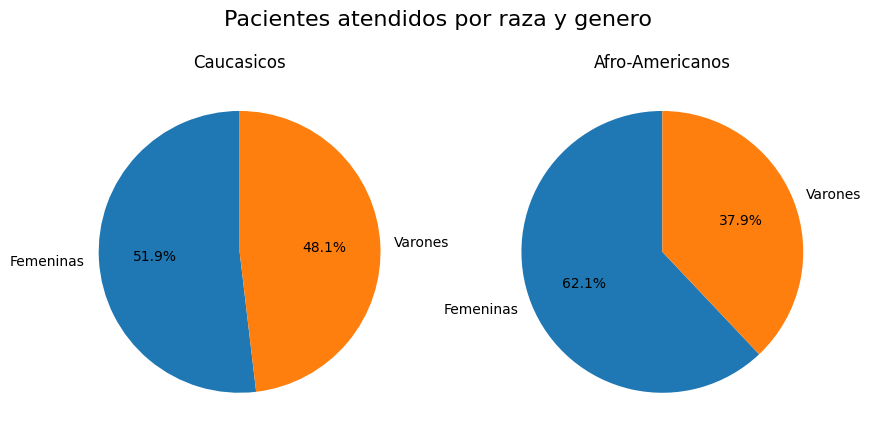

"\nfiltered_gender = df[df['gender_Female'].isin([True, False])]\n\n# Contar la proporción de readmitidos y no readmitidos por género\nreadmitidos = filtered_gender[filtered_gender['readmitted'] == 1]['gender_Female'].value_counts(normalize=True)\nno_readmitidos = filtered_gender[filtered_gender['readmitted'] == 0]['gender_Female'].value_counts(normalize=True)\n\nprint(readmitidos)\nprint(no_readmitidos)\n# Crear un subplot con dos gráficos de torta\nfig, axes = plt.subplots(1, 2, figsize=(10, 5))\n\nnuevas_etiquetas = ['Femeninas', 'Varones']\n\n# Gráfico de torta para readmitidos\naxes[0].pie(readmitidos, labels=nuevas_etiquetas, autopct='%1.1f%%', startangle=90)\naxes[0].set_title('Readmitidos')\n\n# Gráfico de torta para no readmitidos\naxes[1].pie(no_readmitidos, labels=nuevas_etiquetas, autopct='%1.1f%%', startangle=90)\naxes[1].set_title('No readmitidos')\n\nplt.suptitle('Reingreso de pacientes por género', fontsize=16)\nplt.show()"

In [ ]:
filtered_gender = df[df['gender_Female'].isin([True, False])]
#print(gender)

# Contar la cantidad de empleados por departamento
Caucasian_Count = filtered_gender[filtered_gender['race_Caucasian']== True]['gender_Female'].value_counts(normalize=True)
AfroAmerican_Count = filtered_gender[filtered_gender['race_AfricanAmerican']== True]['gender_Female'].value_counts(normalize=True)
#print(Male_Count)

# Crear un subplot con dos gráficos de torta
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

nuevas_etiquetas = ['Femeninas', 'Varones']

# Gráfico de torta para hombres
axes[0].pie(Caucasian_Count, labels=nuevas_etiquetas, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Caucasicos')

# Gráfico de torta para mujeres
axes[1].pie(AfroAmerican_Count, labels=nuevas_etiquetas, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Afro-Americanos')

plt.suptitle('Pacientes atendidos por raza y genero', fontsize=16)
plt.show()
'''
filtered_gender = df[df['gender_Female'].isin([True, False])]

# Contar la proporción de readmitidos y no readmitidos por género
readmitidos = filtered_gender[filtered_gender['readmitted'] == 1]['gender_Female'].value_counts(normalize=True)
no_readmitidos = filtered_gender[filtered_gender['readmitted'] == 0]['gender_Female'].value_counts(normalize=True)

print(readmitidos)
print(no_readmitidos)
# Crear un subplot con dos gráficos de torta
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

nuevas_etiquetas = ['Femeninas', 'Varones']

# Gráfico de torta para readmitidos
axes[0].pie(readmitidos, labels=nuevas_etiquetas, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Readmitidos')

# Gráfico de torta para no readmitidos
axes[1].pie(no_readmitidos, labels=nuevas_etiquetas, autopct='%1.1f%%', startangle=90)
axes[1].set_title('No readmitidos')

plt.suptitle('Reingreso de pacientes por género', fontsize=16)
plt.show()'''


##**Reingresos de pacientes por genero y raza**

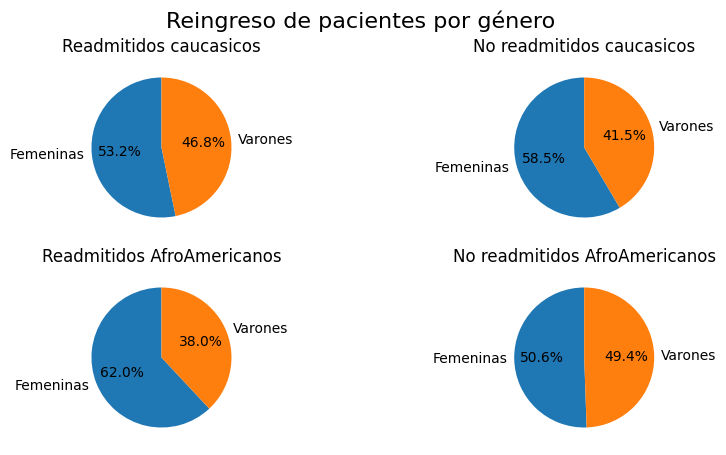

In [ ]:

filtered_gender = df[df['gender_Female'].isin([True, False])]

# Contar la proporción de readmitidos y no readmitidos por género
readmitidos_Caucasian= filtered_gender[
    (filtered_gender['readmitted'] == 1) &
    (filtered_gender['race_Caucasian'] == True)
    ]['gender_Female'].value_counts(normalize=True)

no_readmitidos_Caucasian = filtered_gender[
    (filtered_gender['readmitted'] == 0) &
    (filtered_gender['race_Caucasian'] == False)
    ]['gender_Female'].value_counts(normalize=True)

readmitidos_AfroAmericanos = filtered_gender[
    (filtered_gender['readmitted'] == 1) &
    (filtered_gender['race_AfricanAmerican'] == True)
    ]['gender_Female'].value_counts(normalize=True)

no_readmitidos_AfroAmericanos = filtered_gender[
    (filtered_gender['readmitted'] == 0) &
    (filtered_gender['race_AfricanAmerican'] == False)
    ]['gender_Female'].value_counts(normalize=True)

#print(readmitidos_Caucasian)
#print(no_readmitidos_Caucasian)
# Crear un subplot con dos gráficos de torta
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

nuevas_etiquetas = ['Femeninas', 'Varones']
##
# Gráfico de torta para readmitidos
axes[0,0].pie(readmitidos_Caucasian, labels=nuevas_etiquetas, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Readmitidos caucasicos')

# Gráfico de torta para no readmitidos
axes[0,1].pie(no_readmitidos_Caucasian, labels=nuevas_etiquetas, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('No readmitidos caucasicos')

# Gráfico de torta para readmitidos
axes[1,0].pie(readmitidos_AfroAmericanos, labels=nuevas_etiquetas, autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Readmitidos AfroAmericanos')

# Gráfico de torta para no readmitidos
axes[1,1].pie(no_readmitidos_AfroAmericanos, labels=nuevas_etiquetas, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('No readmitidos AfroAmericanos')

plt.suptitle('Reingreso de pacientes por género', fontsize=16)
plt.show()




Es evidente la diferencia en los pacientes que son readmitos o no readmitos basandose en el genero y en su raza.





##**Readmicion por rangos de edad**

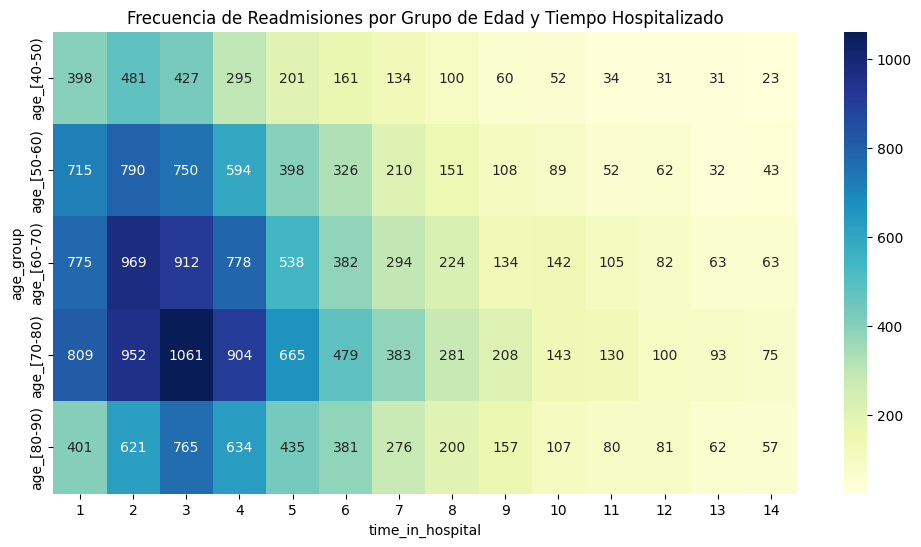

In [ ]:
df_melted = df.melt(
                    id_vars=['time_in_hospital', 'readmitted'],
                    value_vars=['age_[40-50)','age_[50-60)','age_[60-70)','age_[70-80)', 'age_[80-90)'],
                    var_name='age_group', value_name='has_age')


# Filtrar solo las filas donde 'has_age' es 1 (presencia de esa categoría de edad)
df_filtered = df_melted[df_melted['has_age'] == True]

# Crear una tabla pivotante con el conteo de readmisiones por grupo de edad y tiempo hospitalizado
heatmap_data = df_filtered.pivot_table(
    index='age_group',
    columns='time_in_hospital',
    values='readmitted',
    aggfunc='count',
    fill_value=0
)

# Crear el heatmap con Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')

plt.title('Frecuencia de Readmisiones por Grupo de Edad y Tiempo Hospitalizado')
plt.show()


Es claro que el tiempo hospitalizado influyen en el seguimiento medico por rangos de edad, mostrando un auge entre 1 a 4 dias y en un rango de 70 a 80 años. Esto genera un posible indice en el que los pacientes que tiene una estancia mayor hospitalizados no dan seguimiento clinico por costos y duracion de esta misma.

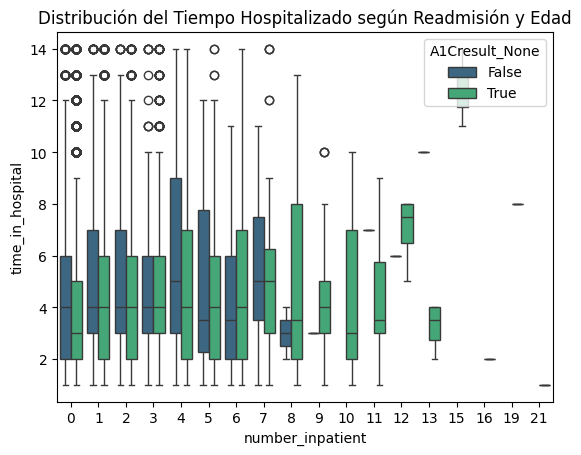

In [ ]:
sns.boxplot(data=df, x='number_inpatient', y='time_in_hospital', hue='A1Cresult_None', palette='viridis')
plt.title('Distribución del Tiempo Hospitalizado según Readmisión y Edad')
plt.show()

Es claro que si se sufre de diabetes esta influye en la cantidad de internados hospitalarios que el paciente requiere.

#**Random Forest Classifier**
El bosque aleatorio es un algoritmo de aprendizaje automático de uso común, registrado por Leo Breiman y Adele Cutler, que combina el resultado de múltiples árboles de decisión para llegar a un resultado único. Su facilidad de uso y flexibilidad han impulsado su adopción, ya que maneja problemas de clasificación y regresión.

El algoritmo de bosque aleatorio es una extensión del método bagging o embolsado, ya que emplea tanto el embolsado como la aleatoriedad de características para crear un bosque de árboles de decisión que no están correlacionados. La aleatoriedad de características, también conocida como embolsado de características o “método aleatorio del subespacio” (enlace externo a ibm.com), genera un subconjunto aleatorio de características, lo que garantiza una baja correlación entre los árboles de decisión. Esta es una diferencia fundamental entre los árboles de decisión y los bosques aleatorios. Mientras que los árboles de decisión consideran todas las posibles divisiones de características, los bosques aleatorios solo seleccionan un subconjunto de esas características.

Los algoritmos de random forest tienen tres hiperparámetros principales, que deben configurarse antes del entrenamiento:

1. Tamaño del nodo
2. Cantidad de árboles
3. Cantidad de características muestreadas
A partir de ahí, el clasificador de random forest se puede utilizar para solucionar problemas de regresión o clasificación.

El algoritmo de random forest se compone de un conjunto de árboles de decisión, y cada árbol del conjunto se compone de una muestra de datos extraída de un conjunto de entrenamiento con reemplazo, llamada muestra de arranque.

De esa muestra de entrenamiento, un tercio se reserva como datos de prueba, lo que se conoce como muestra fuera de la bolsa (oob), a la que volveremos más adelante. Luego, se inyecta otra instancia de aleatoriedad a través del agrupamiento de características, lo que agrega más diversidad al conjunto de datos y reduce la correlación entre los árboles de decisión.

Dependiendo del tipo de problema, la determinación de la predicción variará. Para una tarea de regresión, se promediarán los árboles de decisión individuales, y para una tarea de clasificación, un voto mayoritario, es decir, la variable categórica más frecuente, arrojará la clase predicha.

Finalmente, la muestra de oob se utiliza para la validación cruzada, finalizando esa predicción.

## **Recursive Feature Elimination (Eliminación Recursiva de Características).**

Dado un estimador externo que asigna pesos a las características (por ejemplo, los coeficientes de un modelo lineal), el objetivo de la eliminación recursiva de características (RFE) es seleccionar características considerando recursivamente conjuntos de características cada vez más pequeños. Primero, el estimador se entrena en el conjunto inicial de características y la importancia de cada característica se obtiene a través de cualquier atributo específico o invocable. Luego, las características menos importantes se eliminan del conjunto actual de características. Ese procedimiento se repite recursivamente en el conjunto eliminado hasta que finalmente se alcanza la cantidad deseada de características para seleccionar.

## First test

In [ ]:
df = df.dropna(subset=['readmitted'])

# Define features and target variable
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



In [ ]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

rfe= RFE(rf,n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train,y_train)

# Train the model
rf.fit(X_train_rfe, y_train)

X_test_rfe = rfe.transform(X_test)

# Make predictions on the test set
y_pred = rf.predict(X_test_rfe)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

KeyboardInterrupt: 

In [ ]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)


In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Random Forest')
plt.show()

##Code

In [ ]:
# Eliminar filas con valores faltantes en la columna 'readmitted'
df1 = df.dropna(subset=['readmitted'])

# Definir características (features) y variable objetivo (target)
X = df1.drop('readmitted', axis=1)
y = df1['readmitted']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((20000, 12), (5000, 12), (20000,), (5000,))

In [ ]:
# Inicializar el clasificador de Random Forest
rf = RandomForestClassifier(random_state=42)

# Inicializar RFE (Recursive Feature Elimination) con el Random Forest
rfe = RFE(rf, n_features_to_select=2)

# Ajustar RFE sobre los datos de entrenamiento
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Entrenar el modelo Random Forest con las características seleccionadas por RFE
rf.fit(X_train_rfe, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Transformar el conjunto de prueba con RFE para mantener las mismas características seleccionadas
X_test_rfe = rfe.transform(X_test)

# Realizar predicciones sobre el conjunto de prueba
y_pred = rf.predict(X_test_rfe)

# Calcular la exactitud (accuracy) del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5324


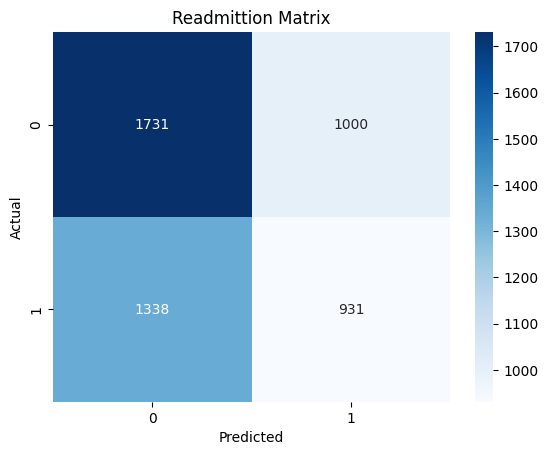

              precision    recall  f1-score   support

           0       0.56      0.63      0.60      2731
           1       0.48      0.41      0.44      2269

    accuracy                           0.53      5000
   macro avg       0.52      0.52      0.52      5000
weighted avg       0.53      0.53      0.53      5000



In [ ]:
# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Readmittion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Mostrar el reporte de clasificación
class_report = classification_report(y_test, y_pred)
print(class_report)

#**Conclusiones**
El modelo tiene un desempeño moderado con un 53% de precisión , pero muestra problemas para clasificar correctamente la clase 1, ya que tiene un recall  bajo de 0.41 en esta clase. Esto indica que el modelo está fallando en identificar correctamente una buena parte de los casos positivos.
Los valores altos en falsos negativos y falsos positivos podrían estar confundiendo ambas clases con bastante frecuencia.

